2. 结合归一化和正则化来优化网络模型结构，观察对比loss结果。

In [2]:
# 导入数据集
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces # 导入Olivetti人脸数据集
from sklearn.model_selection import train_test_split # 导入训练测试数据集划分函数
from torch.utils.data import DataLoader # 导入数据加载器

In [3]:
# 加载数据集
faces_data = fetch_olivetti_faces(
    data_home="./face_data", shuffle=True
)  # 下载Olivetti人脸数据集
print(faces_data.DESCR)  # 打印数据集描述
print(faces_data.data.shape)  # 打印数据集大小
print(faces_data.target.shape)  # 打印数据集标签大小
print(faces_data.images.shape)  # 打印数据集图像大小

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [4]:
# 
images = torch.tensor(faces_data.data)  # 将数据转换为张量
targets = torch.tensor(faces_data.target, dtype=torch.long)  # 将标签转换为张量

print(images.shape)  # 打印图像数据大小
print(targets.shape)  # 打印标签数据大小

dataset = [(img, lbl) for img, lbl in zip(images, targets)]  # 将数据集转换为列表形式
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True) # 创建数据加载器
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 检测是否有GPU可用

torch.Size([400, 4096])
torch.Size([400])


In [6]:
# 定义训练模型函数
def train_model(model):

    # 损失函数和优化器
    criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器

    # 训练模型
    loss_list = []  # 初始化损失列表
    model.train()  # 设置模型为训练模式

    for i in range(20):
        for img, lbl in dataloader:
            img, lbl = img.to(device), lbl.to(device)  # 将数据移动到GPU上
            result = model(img)  # 前向传播
            loss = criterion(result, lbl)  # 计算损失
            loss.backward()  # 反向传播
            optimizer.step()  # 更新参数
            optimizer.zero_grad()  # 清空梯度

            loss_list.append(loss.item())  # 记录损失
            print(f"Epoch {i+1}, Loss: {loss.item():.4f}")  # 打印损失

    return loss_list  # 返回损失列表

In [7]:
# 定义模型
# 多层神经网络模型: 1.增加Dropout层
dropOutModel = nn.Sequential(
    nn.Linear(4096, 8192),  # 输入层到隐藏层
    nn.ReLU(),  # 激活函数
    nn.Dropout(),  # Dropout层
    
    nn.Linear(8192, 16384),  # 隐藏层到隐藏层
    nn.ReLU(),  # 激活函数
    nn.Dropout(),  # Dropout层
    
    nn.Linear(16384, 1024),  # 隐藏层到隐藏层
    nn.ReLU(),  # 激活函数
    nn.Dropout(),  # Dropout层
    
    nn.Linear(1024, 40)  # 隐藏层到输出层
).to(device)  # 创建多层神经网络模型并将其移动到GPU上

# 多层神经网络模型: 2.增加Dropout层, 增加BatchNorm1d层
dropOutBatchNormModel = nn.Sequential(
    nn.Linear(4096, 8192),  # 输入层到隐藏层
    nn.BatchNorm1d(8192),  # 批归一化层
    nn.ReLU(),  # 激活函数
    nn.Dropout(),  # Dropout层
    
    nn.Linear(8192, 16384),  # 隐藏层到隐藏层
    nn.BatchNorm1d(16384),  # 批归一化层
    nn.ReLU(),  # 激活函数
    nn.Dropout(),  # Dropout层
    
    nn.Linear(16384, 1024),  # 隐藏层到隐藏层
    nn.BatchNorm1d(1024),  # 批归一化层
    nn.ReLU(),  # 激活函数
    nn.Dropout(),  # Dropout层
    
    nn.Linear(1024, 40)  # 隐藏层到输出层
).to(device)  # 创建多层神经网络模型并将其移动到GPU上

In [8]:
# 训练模型
dropout_loss_list = train_model(dropOutModel)
dropoutBatchNorm_loss_list = train_model(dropOutBatchNormModel)

Epoch 1, Loss: 3.6758
Epoch 1, Loss: 25.0856
Epoch 1, Loss: 10.0077
Epoch 1, Loss: 4.1428
Epoch 1, Loss: 4.3187
Epoch 1, Loss: 3.9673
Epoch 1, Loss: 4.2558
Epoch 1, Loss: 3.8140
Epoch 1, Loss: 3.7245
Epoch 1, Loss: 3.8098
Epoch 1, Loss: 3.7670
Epoch 1, Loss: 3.8558
Epoch 1, Loss: 3.9313
Epoch 1, Loss: 3.7412
Epoch 1, Loss: 3.7857
Epoch 1, Loss: 3.6828
Epoch 1, Loss: 3.6452
Epoch 1, Loss: 3.6577
Epoch 1, Loss: 4.0874
Epoch 1, Loss: 3.7115
Epoch 1, Loss: 3.8097
Epoch 1, Loss: 3.7569
Epoch 1, Loss: 3.8049
Epoch 1, Loss: 3.6773
Epoch 1, Loss: 3.6478
Epoch 1, Loss: 3.9008
Epoch 1, Loss: 3.7133
Epoch 1, Loss: 3.6556
Epoch 1, Loss: 3.8419
Epoch 1, Loss: 3.7318
Epoch 1, Loss: 3.7210
Epoch 1, Loss: 3.8954
Epoch 1, Loss: 3.7807
Epoch 1, Loss: 3.7106
Epoch 1, Loss: 3.8773
Epoch 1, Loss: 3.7286
Epoch 1, Loss: 3.6705
Epoch 1, Loss: 3.7068
Epoch 1, Loss: 3.8500
Epoch 1, Loss: 3.9330
Epoch 2, Loss: 3.7669
Epoch 2, Loss: 3.6512
Epoch 2, Loss: 3.8226
Epoch 2, Loss: 3.6324
Epoch 2, Loss: 3.8025
Epoch 2,

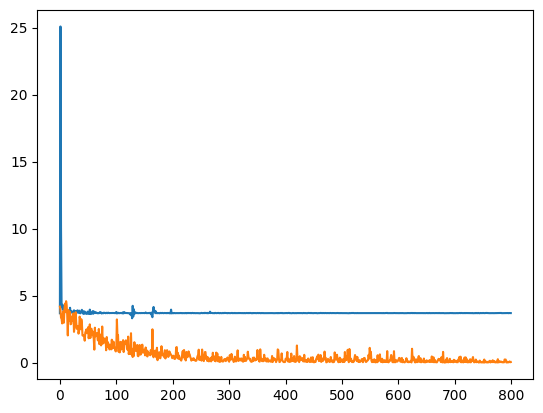

In [9]:
plt.plot(range(len(dropout_loss_list)),dropout_loss_list)  # 绘制损失曲线
plt.plot(range(len(dropoutBatchNorm_loss_list)),dropoutBatchNorm_loss_list)  # 绘制损失曲线